In [1]:
import pandas as pd
myDF = pd.read_csv('logistic-heartattack.csv')
myDF.head()

,secondha,angertreat,traitanxiety
0,1,1,70
1,1,1,80
2,1,1,50
3,1,0,60
4,1,0,40


In [2]:
# Install statsmodels using conda install statsmodels
from statsmodels.formula.api import logit 
logitModel = logit("secondha~traitanxiety", data = myDF)
myFit = logitModel.fit()

Optimization terminated successfully.
         Current function value: 0.490013
         Iterations 6


In [3]:
myFit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               secondha   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Mon, 01 May 2017   Pseudo R-squ.:                  0.2931
Time:                        13:10:22   Log-Likelihood:                -9.8003
converged:                       True   LL-Null:                       -13.863
                                        LLR p-value:                  0.004365
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -7.0925      3.171     -2.237      0.025       -13.308    -0.877
traitanxiety     0.1246      0.055      2.254      0.024         0.016     0.233
================================================================================
"""

In [4]:
myDF["PredX"]=myFit.fittedvalues
myDF.head()

,secondha,angertreat,traitanxiety,PredX
0,1,1,70,1.631932
1,1,1,80,2.878277
2,1,1,50,-0.860757
3,1,0,60,0.385587
4,1,0,40,-2.107102


In [5]:
import numpy as np
myDF["PredP"]=np.exp(myDF["PredX"]) / (1+np.exp(myDF["PredX"])) # did not use math.exp because it does not understand the series type
myDF.head()

,secondha,angertreat,traitanxiety,PredX,PredP
0,1,1,70,1.631932,0.836434
1,1,1,80,2.878277,0.946762
2,1,1,50,-0.860757,0.297181
3,1,0,60,0.385587,0.595220
4,1,0,40,-2.107102,0.108408


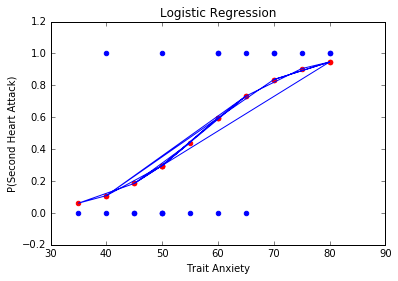

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.cla()
plt.scatter(myDF["traitanxiety"],myDF["secondha"], color=['blue'])
plt.scatter(myDF["traitanxiety"],myDF["PredP"], color=['red'])
plt.plot(myDF["traitanxiety"],myDF["PredP"])
plt.xlabel("Trait Anxiety")
plt.ylabel("P(Second Heart Attack)")
plt.title("Logistic Regression")
plt.show()

In [7]:
myDF = myDF.sort_values('PredP', ascending=True)

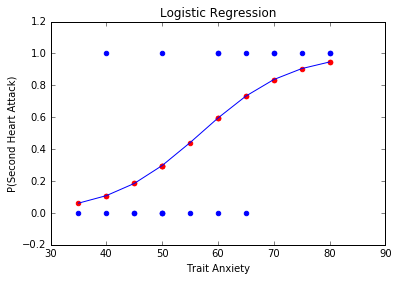

In [8]:
plt.scatter(myDF["traitanxiety"],myDF["secondha"], color=['blue'])
plt.scatter(myDF["traitanxiety"],myDF["PredP"], color=['red'])
plt.plot(myDF["traitanxiety"],myDF["PredP"])
plt.xlabel("Trait Anxiety")
plt.ylabel("P(Second Heart Attack)")
plt.title("Logistic Regression")
plt.show()